
# SHEIN Electronics: Data Cleaning & Automation (Excel → Python)

**Goal:** Take a messy CSV of SHEIN electronics listings, clean and standardize it with Python (pandas), automate useful summaries, and export clean deliverables for a portfolio-ready project.

**Dataset:** `us-shein-electronics-4395.csv` 

**Deliverables:**
- `cleaned_us-shein-electronics.csv` (clean table)
- `summary_by_subcategory.csv`, `summary_top_discounted.csv`, `summary_price_distribution.csv`
- Before/After sample preview in the notebook
- Optional visuals (matplotlib) for price distribution and discount ranking


## 1) Setup & Imports

In [103]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Display options
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

RAW_PATH = Path("us-shein-electronics-4395.csv")
CLEAN_PATH = Path("cleaned_us-shein-electronics.csv")
OUT_DIR = Path("")

RAW_PATH, OUT_DIR, CLEAN_PATH


(WindowsPath('us-shein-electronics-4395.csv'),
 WindowsPath('.'),
 WindowsPath('cleaned_us-shein-electronics.csv'))

## 2) Load Raw Data

In [104]:

assert RAW_PATH.exists(), f"Raw CSV not found at {RAW_PATH}. Update RAW_PATH above if needed."
df_raw = pd.read_csv(RAW_PATH)
print("Raw shape:", df_raw.shape)
df_raw.head()


Raw shape: (4394, 9)


,goods-title-link--jump,goods-title-link--jump href,rank-title,rank-sub,price,discount,selling_proposition,color-count,goods-title-link
0,10pcs Random Color Data Cable Organizer,https://us.shein.com/10pcs-Random-Color-Data-C...,#10 Best Sellers,in Cable Storage,$1.36,-20%,NaN,NaN,NaN
1,3pcs Anti Glare Tempered Glass Front Film Phon...,https://us.shein.com/3pcs-Anti-Glare-Tempered-...,#1 Best Sellers,in Screen Protectors,$2.32,-20%,NaN,NaN,NaN
2,"Universal Waterproof Phone Pouch, Waterproof P...",https://us.shein.com/Universal-Waterproof-Phon...,NaN,NaN,$1.70,NaN,600+ sold recently,NaN,NaN
3,"Silicone Phone Suction Cup, 24PCS Universal Su...",https://us.shein.com/Silicone-Phone-Suction-Cu...,#5 Best Sellers,in Adhesive Cardholders,$0.38,-71%,NaN,8.0,NaN
4,Customized Phone Case Compatible With Iphone 1...,https://us.shein.com/Customized-Phone-Case-Com...,#9 Best Sellers,in Customized Phone Cases,$3.10,NaN,NaN,7.0,NaN


## 3) Quick Data Audit

In [105]:

display(df_raw.head(10))
print("\nINFO:")
print(df_raw.info())
print("\nNULLS per column:")
print(df_raw.isna().sum().sort_values(ascending=False))
print("\nSAMPLE unique counts:")
print(df_raw.nunique())


,goods-title-link--jump,goods-title-link--jump href,rank-title,rank-sub,price,discount,selling_proposition,color-count,goods-title-link
0,10pcs Random Color Data Cable Organizer,https://us.shein.com/10pcs-Random-Color-Data-C...,#10 Best Sellers,in Cable Storage,$1.36,-20%,NaN,NaN,NaN
1,3pcs Anti Glare Tempered Glass Front Film Phon...,https://us.shein.com/3pcs-Anti-Glare-Tempered-...,#1 Best Sellers,in Screen Protectors,$2.32,-20%,NaN,NaN,NaN
2,"Universal Waterproof Phone Pouch, Waterproof P...",https://us.shein.com/Universal-Waterproof-Phon...,NaN,NaN,$1.70,NaN,600+ sold recently,NaN,NaN
3,"Silicone Phone Suction Cup, 24PCS Universal Su...",https://us.shein.com/Silicone-Phone-Suction-Cu...,#5 Best Sellers,in Adhesive Cardholders,$0.38,-71%,NaN,8.0,NaN
4,Customized Phone Case Compatible With Iphone 1...,https://us.shein.com/Customized-Phone-Case-Com...,#9 Best Sellers,in Customized Phone Cases,$3.10,NaN,NaN,7.0,NaN
5,1pc Macaron Ombre Dual-Ended Stylus Pen For To...,https://us.shein.com/1pc-Macaron-Ombre-Dual-En...,#10 Best Sellers,in Stylus Pen,$0.90,-40%,NaN,NaN,NaN
6,High Definition Screen Smartwatch 1.91inchLED ...,https://us.shein.com/High-Definition-Screen-Sm...,NaN,NaN,$9.80,-4%,600+ sold recently,7.0,NaN
7,6 PCS/Set 5 Holes Silicone Strap Wire Organize...,https://us.shein.com/6-PCS-Set-5-Holes-Silicon...,#1 Best Sellers,in Cable Storage,$1.30,NaN,NaN,NaN,NaN
8,Universal Desktop Data Cable Fixing Clip,https://us.shein.com/Universal-Desktop-Data-Ca...,NaN,NaN,$1.60,NaN,1.3k+ sold recently,NaN,NaN
9,1pc Headset Wire Winder Silicone Cable Organiz...,https://us.shein.com/1pc-Headset-Wire-Winder-S...,NaN,NaN,$1.70,NaN,50+ sold recently,NaN,NaN



INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394 entries, 0 to 4393
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   goods-title-link--jump       38 non-null     object 
 1   goods-title-link--jump href  38 non-null     object 
 2   rank-title                   747 non-null    object 
 3   rank-sub                     747 non-null    object 
 4   price                        4394 non-null   object 
 5   discount                     1525 non-null   object 
 6   selling_proposition          3167 non-null   object 
 7   color-count                  1138 non-null   float64
 8   goods-title-link             4356 non-null   object 
dtypes: float64(1), object(8)
memory usage: 309.1+ KB
None

NULLS per column:
goods-title-link--jump         4356
goods-title-link--jump href    4356
rank-title                     3647
rank-sub                       3647
color-count                


## 4) Cleaning Plan (Checklist)

- Drop mostly empty columns: `goods-title-link--jump`, `goods-title-link--jump href`.
- Drop empty `product_title` rows.
- Standardize product title: keep `goods-title-link` as `product_title`.
- `rank-title`: extract numeric rank (e.g., `#10 Best Sellers` → `rank_number = 10`, `rank_group = Best Sellers`).
- `rank-sub`: remove the `in ` prefix and keep the subcategory (e.g., `in Screen Protectors` → `Screen Protectors`).
- `price`: strip `$` and convert to numeric (float).
- `discount`: remove `-` and `%` and convert to integer (NaN → 0).
- `selling_proposition`: (optional) extract numeric "sold recently" if present.
- `color-count`: cast to integer, leaving NaN as-is or fill if you prefer.
- ensure any null blocks within colums have something more suitable within such as `rank_subcategory`, `rank_group`, `rank`, `selling_proposition`, `discount_percent.
- Deduplicate on `product_title` (exact match) and optionally on URL if available.
- Save cleaned CSV and create summary tables + visuals.


## 5) Helper Functions

In [106]:

import re

def clean_price_to_float(x):
    if pd.isna(x):
        return np.nan
    # remove currency symbols and commas
    s = str(x).strip()
    s = s.replace("$", "").replace(",", "")
    try:
        return float(s)
    except ValueError:
        return np.nan

def clean_discount_to_int(x):
    # values look like '-20%' or NaN
    if pd.isna(x):
        return 0
    s = str(x)
    s = s.replace("%", "").replace("-", "").strip()
    if s == "":
        return 0
    try:
        return int(float(s))
    except ValueError:
        return 0

def parse_rank_title(val):
    # example: "#5 Best Sellers" → (5, "Best Sellers")
    # returns (rank_number:int or NaN, rank_group:str or NaN)
    if pd.isna(val):
        return (np.nan, np.nan)
    s = str(val).strip()
    m = re.match(r"#(\d+)\s+(.*)", s)
    if m:
        num = int(m.group(1))
        group = m.group(2).strip()
        return (num, group)
    return (np.nan, s if s else np.nan)

def clean_rank_sub(val):
    # example: "in Screen Protectors" → "Screen Protectors"
    if pd.isna(val):
        return np.nan
    s = str(val).strip()
    if s.lower().startswith("in "):
        return s[3:].strip()
    return s

def normalize_title(val):
    if pd.isna(val):
        return np.nan
    # Basic normalization: strip, single spaces, title case-like without overdoing acronyms
    s = " ".join(str(val).split())
    return s

def extract_recent_sold(val):
    # selling_proposition like "600+ sold recently" → 600
    if pd.isna(val):
        return np.nan
    s = str(val).lower()
    m = re.search(r"(\d+[\,\d]*)\s*\+?\s*sold\s+recently", s)
    if m:
        num = m.group(1).replace(",", "")
        try:
            return int(num)
        except ValueError:
            return np.nan
    return np.nan


## 6) Apply Cleaning

In [107]:

df = df_raw.copy()

# 6.1 Drop mostly-empty columns
for col in ["goods-title-link--jump", "goods-title-link--jump href"]:
    if col in df.columns:
        df = df.drop(columns=[col])

# 6.2 Rename / standardize the product title
title_col = "goods-title-link" if "goods-title-link" in df.columns else None
if title_col is None:
    raise KeyError("Expected 'goods-title-link' column not found.")
df = df.rename(columns={title_col: "product_title"})
df["product_title"] = df["product_title"].apply(normalize_title)
df = df.dropna(subset=["product_title"])

# 6.3 Rank columns
if "rank-title" in df.columns:
    parsed = df["rank-title"].apply(parse_rank_title)
    df["rank_number"] = parsed.apply(lambda x: x[0])
    df["rank_group"] = parsed.apply(lambda x: x[1])
    df = df.drop(columns=["rank-title"])
else:
    df["rank_number"] = np.nan
    df["rank_group"] = np.nan

# Replace null rank_number with 'Not Applicable'
df["rank_number"] = df["rank_number"].fillna("Not Applicable")

# Replace null rank_group with 'Not Ranked'
df["rank_group"] = df["rank_group"].fillna("Not Ranked")

if "rank-sub" in df.columns:
    df["rank_subcategory"] = df["rank-sub"].apply(clean_rank_sub)
    df = df.drop(columns=["rank-sub"])
else:
    df["rank_subcategory"] = np.nan

# Replace null rank_subcategory with 'Uncategorized'
df["rank_subcategory"] = df["rank_subcategory"].fillna("Uncategorized")


# 6.4 Price & Discount
if "price" in df.columns:
    df["price"] = df["price"].apply(clean_price_to_float)

if "discount" in df.columns:
    df["discount_percent"] = df["discount"].apply(clean_discount_to_int)
    df = df.drop(columns=["discount"])
    
# 6.5 Selling proposition → keep text, fill NaN with 'None'
if "selling_proposition" in df.columns:
    df["selling_proposition"] = df["selling_proposition"].fillna("None")
    df["sold_recently"] = df["selling_proposition"].apply(extract_recent_sold).fillna(0).astype(int)
    # Replace NaN with 0
    df["sold_recently"] = df["sold_recently"].fillna(0).astype(int)
    
# 6.6 Color count: create cleaned column, then drop the original
if "color-count" in df.columns:
    # Option: fill NaNs with 1 (your preferred behavior), keep as standard int
    df["color_count"] = df["color-count"].fillna(1).astype(int)
    df = df.drop(columns=["color-count"])
else:
    # If source column doesn't exist, ensure the target exists
    df["color_count"] = pd.Series(dtype="Int64")

# 6.7 Deduplicate by product_title
before = len(df)
df = df.drop_duplicates(subset=["product_title"], keep="first")
after = len(df)
print(f"Deduplicated rows based on product_title: {before - after} removed")

df.head(10)


Deduplicated rows based on product_title: 327 removed


,price,selling_proposition,product_title,rank_number,rank_group,rank_subcategory,discount_percent,sold_recently,color_count
38,2.60,None,Foldable Desktop Phone Holder,3.0,Best Sellers,Phone Holders,0,0,4
39,0.96,60+ sold recently,Efficient Desk Cable Organizer With 4 Holes Fo...,Not Applicable,Not Ranked,Uncategorized,44,60,1
40,4.24,None,JMMO Wlireless Earbuds With Premium Sound 5.3 ...,4.0,Best Sellers,Premium Wireless Earbuds,29,0,5
41,3.60,40+ sold recently,NEW Travel Organizer Bag Cable Storage Organiz...,Not Applicable,Not Ranked,Uncategorized,0,40,1
42,2.00,100+ sold recently,10pcs Solid Silicone Data Cable Clip,Not Applicable,Not Ranked,Uncategorized,0,100,6
43,3.40,100+ sold recently,3pcs Privacy Screen Protector Compatible With ...,Not Applicable,Not Ranked,Uncategorized,0,100,1
44,1.20,None,Professional Wireless Lavalier Lapel Microphon...,2.0,Best Sellers,Musical Instruments & Accessories,0,0,1
45,12.30,10+ sold recently,10inch Selfie Ring Light Photography Led Rim O...,Not Applicable,Not Ranked,Uncategorized,0,10,1
46,0.90,100+ sold recently,"10pcs Random Color Silicone Cable Ties, Cable ...",Not Applicable,Not Ranked,Uncategorized,40,100,1
47,0.43,400+ sold recently,6pcs Charger Cable Saver: Snug Fit For All Cel...,Not Applicable,Not Ranked,Uncategorized,67,400,1


## 7) Data Quality Checks

In [108]:

print("CLEANED INFO:")
print(df.info())
print("\nNULLS per column (cleaned):")
print(df.isna().sum().sort_values(ascending=False))
print("\nDescriptive stats for numeric columns:")
display(df.describe(include=[np.number]))

display(df.sample(5, random_state=42))


CLEANED INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 4029 entries, 38 to 4393
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                4029 non-null   float64
 1   selling_proposition  4029 non-null   object 
 2   product_title        4029 non-null   object 
 3   rank_number          4029 non-null   object 
 4   rank_group           4029 non-null   object 
 5   rank_subcategory     4029 non-null   object 
 6   discount_percent     4029 non-null   int64  
 7   sold_recently        4029 non-null   int32  
 8   color_count          4029 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 283.3+ KB
None

NULLS per column (cleaned):
price                  0
selling_proposition    0
product_title          0
rank_number            0
rank_group             0
rank_subcategory       0
discount_percent       0
sold_recently          0
color_count            0
d

,price,discount_percent,sold_recently,color_count
count,4029.000000,4029.000000,4029.000000,4029.000000
mean,6.622509,10.262100,156.855299,2.318938
std,31.037200,17.819583,242.315080,2.799364
min,0.300000,0.000000,0.000000,1.000000
25%,1.800000,0.000000,0.000000,1.000000
50%,2.300000,0.000000,20.000000,1.000000
75%,4.000000,19.000000,200.000000,1.000000
max,1199.000000,80.000000,1000.000000,31.000000


,price,selling_proposition,product_title,rank_number,rank_group,rank_subcategory,discount_percent,sold_recently,color_count
1224,1.35,500+ sold recently,1 Pc Folding Rabbit Mirror Bracket Case Compat...,Not Applicable,Not Ranked,Uncategorized,53,500,1
703,2.20,4.3k+ sold recently,1pc Mobile Phone Card Reader Compatible With S...,Not Applicable,Not Ranked,Uncategorized,0,0,1
716,1.69,None,"Clear Acrylic Phone Case With Large Holes, Ant...",2.0,Best Sellers,Phone Cases,6,0,1
3371,2.00,700+ sold recently,1pc Wine Red TPU Heart Anti-Fall Phone Case Co...,Not Applicable,Not Ranked,Uncategorized,0,700,5
2115,3.00,600+ sold recently,Cute 3D Bear Heart Mirror Plated Phone Case Fo...,Not Applicable,Not Ranked,Uncategorized,0,600,4


## 8) Save Cleaned CSV

In [109]:

df.to_csv(CLEAN_PATH, index=False)
print(f"Saved cleaned CSV to: {CLEAN_PATH}")


Saved cleaned CSV to: cleaned_us-shein-electronics.csv


## 9) Automated Summaries

In [110]:

# 9.1 Average price by subcategory
summary_by_subcat = (
    df.groupby("rank_subcategory", dropna=False)["price"]
      .agg(["count", "mean", "median", "min", "max"])
      .reset_index()
      .sort_values(by="mean", ascending=False)
)
summary_by_subcat.to_csv(OUT_DIR / "summary_by_subcategory.csv", index=False)

# 9.2 Top discounted products
summary_top_discounted = (
    df.sort_values(by="discount_percent", ascending=False)
      [["product_title", "rank_group", "rank_subcategory", "price", "discount_percent"]]
      .head(50)
)
summary_top_discounted.to_csv(OUT_DIR / "summary_top_discounted.csv", index=False)

# 9.3 Price distribution table
bins = [0, 5, 10, 20, 50, 100, 200, 500, np.inf]
labels = ["0-5","5-10","10-20","20-50","50-100","100-200","200-500","500+"]
price_binned = pd.cut(df["price"], bins=bins, labels=labels, include_lowest=True)
summary_price_distribution = price_binned.value_counts().sort_index().reset_index()
summary_price_distribution.columns = ["price_band", "count"]
summary_price_distribution.to_csv(OUT_DIR / "summary_price_distribution.csv", index=False)

print("Saved summaries to /mnt/data/:")
print("- summary_by_subcategory.csv")
print("- summary_top_discounted.csv")
print("- summary_price_distribution.csv")

summary_by_subcat.head(10)


Saved summaries to /mnt/data/:
- summary_by_subcategory.csv
- summary_top_discounted.csv
- summary_price_distribution.csv


,rank_subcategory,count,mean,median,min,max
18,CPUs,1,368.870000,368.87,368.87,368.87
106,Laptops,1,289.000000,289.00,289.00,289.00
144,Portable Power Station,3,230.786667,180.43,116.93,395.00
150,Premium Cellphones,3,151.410000,137.33,77.70,239.20
48,Cellphones,3,112.870000,97.99,88.20,152.42
169,Projectors,1,77.700000,77.70,77.70,77.70
36,Car Jump Starter,1,69.690000,69.69,69.69,69.69
192,Tablets PC,1,65.250000,65.25,65.25,65.25
116,Monitors,1,59.970000,59.97,59.97,59.97
199,Walkie Talkie,1,49.800000,49.80,49.80,49.80


## 10) Visuals (Optional)

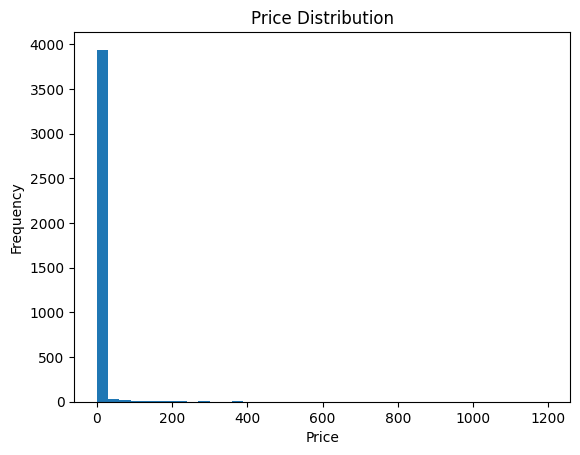

In [111]:

# IMPORTANT: Using matplotlib only, a single chart per cell, and no explicit colors as requested.

# 10.1 Price distribution histogram
plt.figure()
df["price"].dropna().plot(kind="hist", bins=40, title="Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


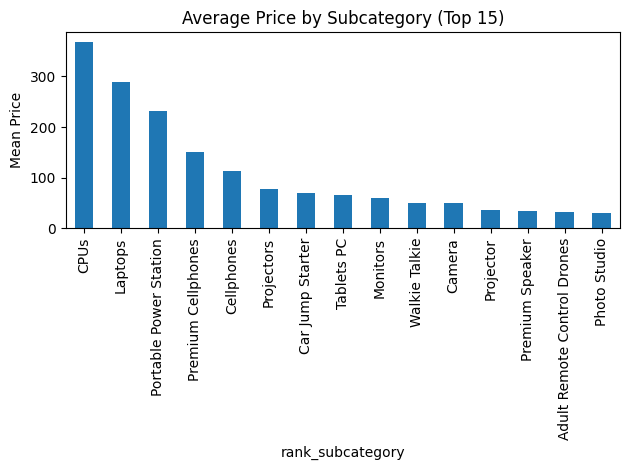

In [112]:

# 10.3 Average price by subcategory (top 15)
plt.figure()
summary_by_subcat.head(15).set_index("rank_subcategory")["mean"].plot(kind="bar", title="Average Price by Subcategory (Top 15)")
plt.ylabel("Mean Price")
plt.tight_layout()
plt.show()


## 11) Before vs After (Sample Rows)

In [113]:

# Join sample by position to show before/after side-by-side (approximate visual)
sample_idx = df.index[:10]
before_sample = df_raw.loc[sample_idx, :].copy()
after_sample = df.loc[sample_idx, :].copy()

print("RAW SAMPLE:")
display(before_sample)
print("\nCLEANED SAMPLE:")
display(after_sample)


RAW SAMPLE:


,goods-title-link--jump,goods-title-link--jump href,rank-title,rank-sub,price,discount,selling_proposition,color-count,goods-title-link
38,NaN,NaN,#3 Best Sellers,in Phone Holders,$2.60,NaN,NaN,4.0,Foldable Desktop Phone Holder
39,NaN,NaN,NaN,NaN,$0.96,-44%,60+ sold recently,NaN,Efficient Desk Cable Organizer With 4 Holes Fo...
40,NaN,NaN,#4 Best Sellers,in Premium Wireless Earbuds,$4.24,-29%,NaN,5.0,JMMO Wlireless Earbuds With Premium Sound 5.3 ...
41,NaN,NaN,NaN,NaN,$3.60,NaN,40+ sold recently,NaN,NEW Travel Organizer Bag Cable Storage Organiz...
42,NaN,NaN,NaN,NaN,$2.00,NaN,100+ sold recently,6.0,10pcs Solid Silicone Data Cable Clip
43,NaN,NaN,NaN,NaN,$3.40,NaN,100+ sold recently,NaN,3pcs Privacy Screen Protector Compatible With ...
44,NaN,NaN,#2 Best Sellers,in Musical Instruments & Accessories,$1.20,NaN,NaN,NaN,Professional Wireless Lavalier Lapel Microphon...
45,NaN,NaN,NaN,NaN,$12.30,NaN,10+ sold recently,NaN,10inch Selfie Ring Light Photography Led Rim O...
46,NaN,NaN,NaN,NaN,$0.90,-40%,100+ sold recently,NaN,"10pcs Random Color Silicone Cable Ties, Cable ..."
47,NaN,NaN,NaN,NaN,$0.43,-67%,400+ sold recently,NaN,6pcs Charger Cable Saver: Snug Fit For All Cel...



CLEANED SAMPLE:


,price,selling_proposition,product_title,rank_number,rank_group,rank_subcategory,discount_percent,sold_recently,color_count
38,2.60,None,Foldable Desktop Phone Holder,3.0,Best Sellers,Phone Holders,0,0,4
39,0.96,60+ sold recently,Efficient Desk Cable Organizer With 4 Holes Fo...,Not Applicable,Not Ranked,Uncategorized,44,60,1
40,4.24,None,JMMO Wlireless Earbuds With Premium Sound 5.3 ...,4.0,Best Sellers,Premium Wireless Earbuds,29,0,5
41,3.60,40+ sold recently,NEW Travel Organizer Bag Cable Storage Organiz...,Not Applicable,Not Ranked,Uncategorized,0,40,1
42,2.00,100+ sold recently,10pcs Solid Silicone Data Cable Clip,Not Applicable,Not Ranked,Uncategorized,0,100,6
43,3.40,100+ sold recently,3pcs Privacy Screen Protector Compatible With ...,Not Applicable,Not Ranked,Uncategorized,0,100,1
44,1.20,None,Professional Wireless Lavalier Lapel Microphon...,2.0,Best Sellers,Musical Instruments & Accessories,0,0,1
45,12.30,10+ sold recently,10inch Selfie Ring Light Photography Led Rim O...,Not Applicable,Not Ranked,Uncategorized,0,10,1
46,0.90,100+ sold recently,"10pcs Random Color Silicone Cable Ties, Cable ...",Not Applicable,Not Ranked,Uncategorized,40,100,1
47,0.43,400+ sold recently,6pcs Charger Cable Saver: Snug Fit For All Cel...,Not Applicable,Not Ranked,Uncategorized,67,400,1



## 12) Notes & Writeup 

**Problem:** Raw SHEIN electronics data contained duplicate title columns, inconsistent pricing formats, incomplete ranking fields, and mixed text categories.

**Approach:**
1. Dropped sparse columns and normalized the canonical product title.
2. Made sure there was no null blocks within columns, made sure to replace it with something more suitable.
3. Dropped any rows with no product title.
4. Parsed ranking info into numeric rank and group, cleaned subcategories.
5. Converted price and discount into numeric fields.
6. Extracted "sold recently" as an integer when available.
7. Converted color counts to nullable integers and removed duplicates.
8. Exported cleaned CSV and generated summary tables + charts.

**Results:**
- Cleaned dataset with standardized schema and types.
- Insights: price distribution by band, average price by subcategory, and top discounted items.



## Project Conclusion  

In this project, I cleaned and standardized a real-world dataset of SHEIN electronics products. The raw CSV contained duplicated title fields, missing values, inconsistent price/discount formats, and incomplete ranking information.  

**Steps taken:**  
- Dropped empty/irrelevant columns and rows with missing product titles.  
- Normalized product names and removed duplicates.  
- Standardized prices and discounts into numeric values.  
- Parsed ranking fields into clear categories and filled gaps with `"Not Applicable"`, `"Not Ranked"`, and `"Uncategorized"`.  
- Cleaned `selling_proposition` by filling blanks with `"None"` and extracting recent sales into a numeric `sold_recently` column (filling missing values with `0`).  
- Converted color counts into integers, assuming at least one color where missing.  
- Exported a fully cleaned dataset plus automated summaries.  

**Results:**  
- Delivered a cleaned dataset ready for analysis or visualization.  
- Produced summary tables of prices, discounts, and product categories.  
- Created clear visuals for distribution of prices, top discounts, and subcategory trends.  

**Business Value:**  
This cleaning process transforms messy e-commerce product data into a structured dataset that supports actionable insights. For example:  
- Which categories have the highest average price.  
- Which products receive the biggest discounts.  
- Recent sales volumes by category.  

This approach demonstrates how to take raw business data and make it **decision-ready**, which is one of the most in-demand freelance skills in data analytics.  

